In [1]:
import pandas as pd
import numpy as np

# Carga de Datos

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
tad = pd.read_parquet('resultados/tad_viajes_G28.parquet')

In [4]:
tad.head()

,Ciclo_Estacion_Retiro,ancla,v_F_tot_sum_100,v_M_tot_sum_100,v_edad_prom_sum_100,v_pct_F_sum_100,v_pct_M_sum_100,v_personas_tot_sum_100,v_tiempo_viaje_max_sum_100,v_tiempo_viaje_mean_sum_100,v_tiempo_viaje_min_sum_100,v_tiempo_viaje_std_sum_100,v_F_tot_mean_100,v_M_tot_mean_100,v_edad_prom_mean_100,v_pct_F_mean_100,v_pct_M_mean_100,v_personas_tot_mean_100,v_tiempo_viaje_max_mean_100,v_tiempo_viaje_mean_mean_100,v_tiempo_viaje_min_mean_100,v_F_tot_min_100,v_M_tot_min_100,v_edad_prom_min_100,v_pct_F_min_100,v_pct_M_min_100,v_personas_tot_min_100,v_tiempo_viaje_max_min_100,v_tiempo_viaje_mean_min_100,v_tiempo_viaje_min_min_100,v_F_tot_max_100,v_M_tot_max_100,v_edad_prom_max_100,v_pct_F_max_100,v_pct_M_max_100,v_personas_tot_max_100,v_tiempo_viaje_max_max_100,v_tiempo_viaje_mean_max_100,v_tiempo_viaje_min_max_100,v_F_tot_std_100,v_M_tot_std_100,v_edad_prom_std_100,v_pct_F_std_100,v_pct_M_std_100,v_personas_tot_std_100,v_tiempo_viaje_max_std_100,v_tiempo_viaje_mean_std_100,v_tiempo_viaje_min_std_100,v_tiempo_viaje_std_mean_100,v_tiempo_viaje_std_min_100,v_tiempo_viaje_std_max_100,v_tiempo_viaje_std_std_100,y
772759,150,12995,137.0,258.0,2504.728300,24.473498,47.526502,395.0,1714.816667,868.487861,446.150000,503.810994,1.902778,3.583333,34.787893,0.339910,0.660090,5.486111,23.816898,12.062331,6.196528,0.0,0.0,21.0,0.0,0.0,1.0,3.800000,3.800000,1.516667,9.0,16.0,49.6,1.0,1.0,22.0,166.183333,33.500000,33.500000,1.769537,2.636419,4.611006,0.258144,0.258144,3.634704,19.948612,5.104807,4.559633,7.633500,1.331718,38.076065,6.230874,1
182234,397,10492,42.0,116.0,2219.876190,14.769048,47.230952,158.0,1082.566667,763.306786,502.133333,320.623130,0.677419,1.870968,35.804455,0.238210,0.761790,2.548387,17.460753,12.311400,8.098925,0.0,0.0,21.0,0.0,0.0,1.0,1.850000,1.850000,1.483333,4.0,6.0,57.0,1.0,1.0,7.0,46.216667,41.250000,41.250000,0.882883,1.234529,7.726531,0.301208,0.301208,1.636444,11.184311,7.368511,7.507125,7.633884,0.896908,27.011479,6.527837,4
3329929,185,23090,123.0,280.0,2697.531979,19.218341,53.781659,403.0,1935.750000,1216.002733,712.500000,521.236096,1.684932,3.835616,36.952493,0.263265,0.736735,5.520548,26.517123,16.657572,9.760274,0.0,0.0,22.0,0.0,0.0,1.0,3.550000,3.550000,2.000000,7.0,12.0,63.5,1.0,1.0,19.0,270.583333,270.583333,270.583333,1.847496,2.857805,7.305700,0.238752,0.238752,4.333685,33.926081,30.806997,31.278590,8.273589,0.895669,67.087417,8.586886,10
754995,171,12937,42.0,148.0,2242.518651,13.904762,47.095238,190.0,2323.266667,1357.672030,488.733333,1161.150375,0.688525,2.426230,36.762601,0.227947,0.772053,3.114754,38.086339,22.256919,8.012022,0.0,0.0,25.0,0.0,0.0,1.0,3.983333,3.983333,1.950000,3.0,9.0,71.0,1.0,1.0,9.0,1060.983333,534.500000,35.450000,0.786151,1.774439,9.225007,0.296178,0.296178,2.033866,134.909298,67.826829,7.793280,24.705327,0.141421,744.559870,108.365160,2
2950884,342,21601,17.0,90.0,2092.033333,7.109524,47.890476,107.0,1435.283333,1046.163571,667.650000,503.948766,0.309091,1.636364,38.036970,0.129264,0.870736,1.945455,26.096061,19.021156,12.139091,0.0,0.0,24.0,0.0,0.0,1.0,2.850000,2.850000,2.850000,2.0,6.0,66.0,1.0,1.0,7.0,437.450000,223.766667,52.650000,0.634581,1.192005,10.656769,0.288827,0.288827,1.406574,57.584227,29.562184,9.371015,19.382645,1.072445,302.193868,57.938748,2


# Variables

In [5]:
um = ['Ciclo_Estacion_Retiro','ancla']
tgt = 'y' # target
varc = tad.filter(like='v_').columns.tolist()   # variables continuas

In [6]:
len(varc), varc

(50,
 ['v_F_tot_sum_100',
  'v_M_tot_sum_100',
  'v_edad_prom_sum_100',
  'v_pct_F_sum_100',
  'v_pct_M_sum_100',
  'v_personas_tot_sum_100',
  'v_tiempo_viaje_max_sum_100',
  'v_tiempo_viaje_mean_sum_100',
  'v_tiempo_viaje_min_sum_100',
  'v_tiempo_viaje_std_sum_100',
  'v_F_tot_mean_100',
  'v_M_tot_mean_100',
  'v_edad_prom_mean_100',
  'v_pct_F_mean_100',
  'v_pct_M_mean_100',
  'v_personas_tot_mean_100',
  'v_tiempo_viaje_max_mean_100',
  'v_tiempo_viaje_mean_mean_100',
  'v_tiempo_viaje_min_mean_100',
  'v_F_tot_min_100',
  'v_M_tot_min_100',
  'v_edad_prom_min_100',
  'v_pct_F_min_100',
  'v_pct_M_min_100',
  'v_personas_tot_min_100',
  'v_tiempo_viaje_max_min_100',
  'v_tiempo_viaje_mean_min_100',
  'v_tiempo_viaje_min_min_100',
  'v_F_tot_max_100',
  'v_M_tot_max_100',
  'v_edad_prom_max_100',
  'v_pct_F_max_100',
  'v_pct_M_max_100',
  'v_personas_tot_max_100',
  'v_tiempo_viaje_max_max_100',
  'v_tiempo_viaje_mean_max_100',
  'v_tiempo_viaje_min_max_100',
  'v_F_tot_std_100

In [7]:
X = tad[varc].copy()

# Análisis Univariado

In [8]:
X[varc].describe(percentiles=[0.01, 0.5, 0.95,0.99])

,v_F_tot_sum_100,v_M_tot_sum_100,v_edad_prom_sum_100,v_pct_F_sum_100,v_pct_M_sum_100,v_personas_tot_sum_100,v_tiempo_viaje_max_sum_100,v_tiempo_viaje_mean_sum_100,v_tiempo_viaje_min_sum_100,v_tiempo_viaje_std_sum_100,v_F_tot_mean_100,v_M_tot_mean_100,v_edad_prom_mean_100,v_pct_F_mean_100,v_pct_M_mean_100,v_personas_tot_mean_100,v_tiempo_viaje_max_mean_100,v_tiempo_viaje_mean_mean_100,v_tiempo_viaje_min_mean_100,v_F_tot_min_100,v_M_tot_min_100,v_edad_prom_min_100,v_pct_F_min_100,v_pct_M_min_100,v_personas_tot_min_100,v_tiempo_viaje_max_min_100,v_tiempo_viaje_mean_min_100,v_tiempo_viaje_min_min_100,v_F_tot_max_100,v_M_tot_max_100,v_edad_prom_max_100,v_pct_F_max_100,v_pct_M_max_100,v_personas_tot_max_100,v_tiempo_viaje_max_max_100,v_tiempo_viaje_mean_max_100,v_tiempo_viaje_min_max_100,v_F_tot_std_100,v_M_tot_std_100,v_edad_prom_std_100,v_pct_F_std_100,v_pct_M_std_100,v_personas_tot_std_100,v_tiempo_viaje_max_std_100,v_tiempo_viaje_mean_std_100,v_tiempo_viaje_min_std_100,v_tiempo_viaje_std_mean_100,v_tiempo_viaje_std_min_100,v_tiempo_viaje_std_max_100,v_tiempo_viaje_std_std_100
count,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440912.000000,440912.000000,440912.000000,440912.000000,440912.000000,440912.000000,440912.000000,440912.000000,440912.000000,440822.000000,440822.000000,440822.000000,4.405770e+05
mean,60.751459,179.645945,2035.703745,14.159343,43.676554,240.397404,1670.371860,902.237796,518.138728,502.418655,0.970225,2.897861,35.210560,0.242607,0.757393,3.868086,29.286254,16.840483,10.424921,0.000202,0.043675,22.007700,0.000061,0.015505,1.000712,4.205190,4.091078,2.761179,4.943635,11.382154,58.039051,0.984495,0.999939,14.711709,464.941406,155.285321,80.664665,1.150593,2.431059,7.454431,0.291295,0.291295,3.066275,64.103451,22.554877,12.912166,12.011466,0.434816,182.885680,2.944275e+01
std,43.491859,126.560931,485.708611,5.156479,10.446920,166.431599,7392.933402,2644.645818,2153.303235,3060.828356,0.540757,1.578735,1.713816,0.064247,0.064247,2.047360,375.580276,347.781899,345.779810,0.016287,0.206381,2.447165,0.005890,0.077146,0.037429,336.836118,336.849390,336.891978,2.856231,8.934758,7.072910,0.077146,0.005890,11.144653,7339.818292,2632.423658,2149.419319,0.534870,1.820654,1.675439,0.058902,0.058902,2.284261,996.730826,416.033998,354.156878,130.360611,4.365954,3045.766264,5.296720e+02
min,0.000000,0.000000,17.000000,0.000000,0.000000,1.000000,2.400000,2.400000,-987.466667,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,1.000000,2.400000,0.323903,-14.270833,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,0.000000,-708.241667,-1429.066667,0.000000,0.000000,17.000000,0.000000,0.000000,1.000000,2.400000,2.400000,2.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082496,0.070711,0.070711,0.000000,0.000000,0.000000,4.514016e-16
1%,6.000000,27.000000,751.000000,3.000000,16.098156,36.000000,346.130667,286.437833,222.514000,42.868234,0.205128,1.000000,31.523099,0.095238,0.599570,1.391304,11.980500,9.414672,4.532878,0.000000,0.000000,17.000000,0.000000,0.000000,1.000000,0.633333,0.616667,0.016667,1.000000,3.000000,44.000000,0.571429,1.000000,3.000000,32.766667,21.283333,12.833333,0.426043,0.650411,4.246534,0.162232,0.162232,0.656790,7.530362,3.871608,2.219867,4.320507,0.000000,10.830519,3.045247e+00
50%,51.000000,150.000000,2114.430556,14.103571,45.114286,203.000000,1331.683333,829.352460,466.733333,371.989472,0.859649,2.529412,35.109740,0.241131,0.758869,3.406250,22.115196,13.720588,8.182090,0.000000,0.000000,22.000000,0.000000,0.000000,1.

array([[<Axes: title={'center': 'v_F_tot_sum_100'}>,
        <Axes: title={'center': 'v_M_tot_sum_100'}>,
        <Axes: title={'center': 'v_edad_prom_sum_100'}>,
        <Axes: title={'center': 'v_pct_F_sum_100'}>,
        <Axes: title={'center': 'v_pct_M_sum_100'}>,
        <Axes: title={'center': 'v_personas_tot_sum_100'}>,
        <Axes: title={'center': 'v_tiempo_viaje_max_sum_100'}>],
       [<Axes: title={'center': 'v_tiempo_viaje_mean_sum_100'}>,
        <Axes: title={'center': 'v_tiempo_viaje_min_sum_100'}>,
        <Axes: title={'center': 'v_tiempo_viaje_std_sum_100'}>,
        <Axes: title={'center': 'v_F_tot_mean_100'}>,
        <Axes: title={'center': 'v_M_tot_mean_100'}>,
        <Axes: title={'center': 'v_edad_prom_mean_100'}>,
        <Axes: title={'center': 'v_pct_F_mean_100'}>],
       [<Axes: title={'center': 'v_pct_M_mean_100'}>,
        <Axes: title={'center': 'v_personas_tot_mean_100'}>,
        <Axes: title={'center': 'v_tiempo_viaje_max_mean_100'}>,
        <Axe

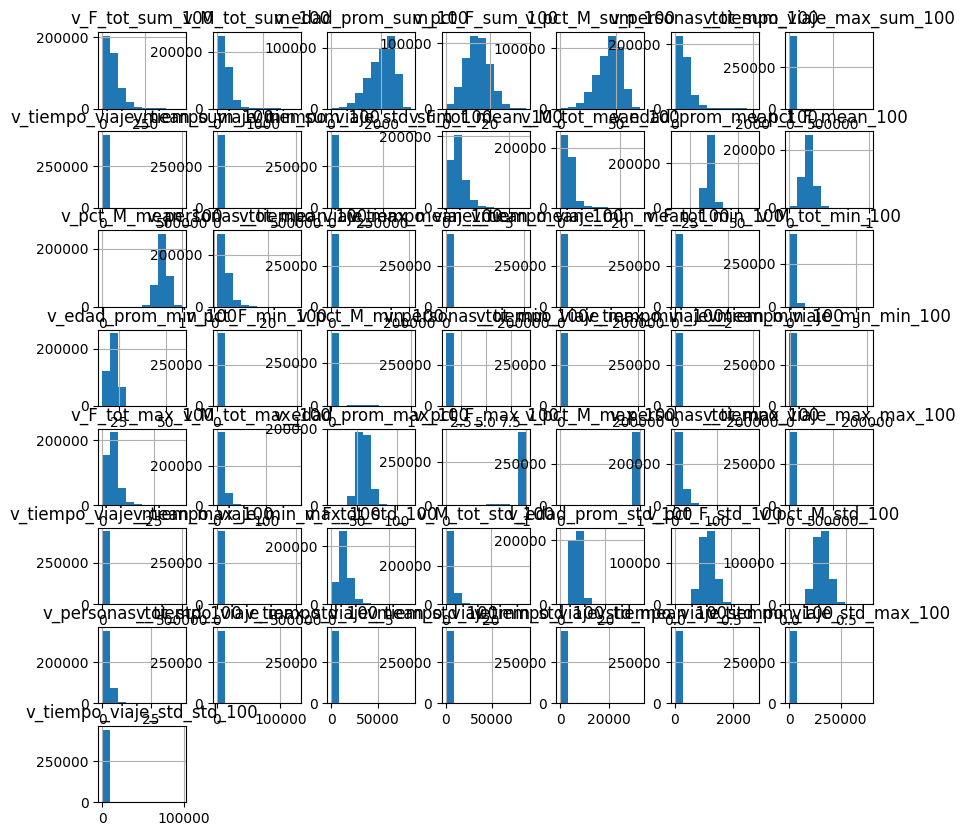

In [9]:
X[varc].hist(figsize=(10,10))

### Valores Ausentes

In [10]:
miss = 1 - X[varc].describe().T[['count']] / len(tad) 

In [11]:
miss

,count
v_F_tot_sum_100,0.000000
v_M_tot_sum_100,0.000000
v_edad_prom_sum_100,0.000000
v_pct_F_sum_100,0.000000
v_pct_M_sum_100,0.000000
v_personas_tot_sum_100,0.000000
v_tiempo_viaje_max_sum_100,0.000000
v_tiempo_viaje_mean_sum_100,0.000000
v_tiempo_viaje_min_sum_100,0.000000
v_tiempo_viaje_std_sum_100,0.000000


In [12]:
X.shape , X.dropna().shape , (X.dropna().shape[0] / X.shape[0])*100

((440985, 50), (440577, 50), 99.90747984625328)

### Imputación de ausentes

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
im = SimpleImputer(strategy='median')

In [15]:
im.fit(X)

SimpleImputer(strategy='median')

In [16]:
X[varc] = im.transform( X[varc] )

In [17]:
X.shape , X.dropna().shape , (X.dropna().shape[0] / X.shape[0])*100

((440985, 50), (440985, 50), 100.0)

### Validación de Distribución Alterada

In [18]:
from scipy.stats import ks_2samp

In [19]:
ks = pd.DataFrame(  map( lambda v: (v , ks_2samp(tad[v].dropna() , X[v] ).statistic   ), varc ) , columns=['Variable','KS']  )

In [20]:
# Lo ideal sería que el estadístico KS no pase el 0.1
ks

,Variable,KS
0,v_F_tot_sum_100,0.000000
1,v_M_tot_sum_100,0.000000
2,v_edad_prom_sum_100,0.000000
3,v_pct_F_sum_100,0.000000
4,v_pct_M_sum_100,0.000000
5,v_personas_tot_sum_100,0.000000
6,v_tiempo_viaje_max_sum_100,0.000000
7,v_tiempo_viaje_mean_sum_100,0.000000
8,v_tiempo_viaje_min_sum_100,0.000000
9,v_tiempo_viaje_std_sum_100,0.000000


In [21]:
# Si alguna variable llegara a sobrepasar el valor 0.1, es un variable "ROTA". No meter al modelo.

### Varianza

In [22]:
from sklearn.feature_selection import VarianceThreshold

In [23]:
vt = VarianceThreshold(threshold=1)

In [24]:
vt.fit( X[varc] )

VarianceThreshold(threshold=1)

In [25]:
sin_varianza = [v for v,u in zip( varc , vt.get_support() ) if not(u) ]

In [26]:
sin_varianza

['v_F_tot_mean_100',
 'v_pct_F_mean_100',
 'v_pct_M_mean_100',
 'v_F_tot_min_100',
 'v_M_tot_min_100',
 'v_pct_F_min_100',
 'v_pct_M_min_100',
 'v_personas_tot_min_100',
 'v_pct_F_max_100',
 'v_pct_M_max_100',
 'v_F_tot_std_100',
 'v_pct_F_std_100',
 'v_pct_M_std_100']

array([[<Axes: title={'center': 'v_F_tot_mean_100'}>,
        <Axes: title={'center': 'v_pct_F_mean_100'}>,
        <Axes: title={'center': 'v_pct_M_mean_100'}>,
        <Axes: title={'center': 'v_F_tot_min_100'}>],
       [<Axes: title={'center': 'v_M_tot_min_100'}>,
        <Axes: title={'center': 'v_pct_F_min_100'}>,
        <Axes: title={'center': 'v_pct_M_min_100'}>,
        <Axes: title={'center': 'v_personas_tot_min_100'}>],
       [<Axes: title={'center': 'v_pct_F_max_100'}>,
        <Axes: title={'center': 'v_pct_M_max_100'}>,
        <Axes: title={'center': 'v_F_tot_std_100'}>,
        <Axes: title={'center': 'v_pct_F_std_100'}>],
       [<Axes: title={'center': 'v_pct_M_std_100'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

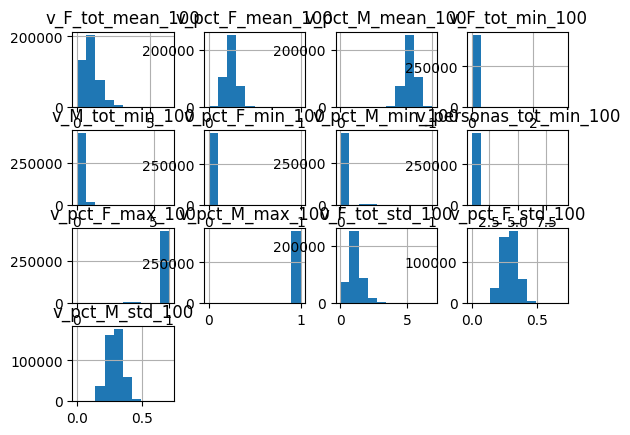

In [27]:
X[sin_varianza].hist()

In [28]:
X[sin_varianza].describe(percentiles=np.arange(0,1.01,.1))

,v_F_tot_mean_100,v_pct_F_mean_100,v_pct_M_mean_100,v_F_tot_min_100,v_M_tot_min_100,v_pct_F_min_100,v_pct_M_min_100,v_personas_tot_min_100,v_pct_F_max_100,v_pct_M_max_100,v_F_tot_std_100,v_pct_F_std_100,v_pct_M_std_100
count,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000,440985.000000
mean,0.970225,0.242607,0.757393,0.000202,0.043675,0.000061,0.015505,1.000712,0.984495,0.999939,1.150576,0.291295,0.291295
std,0.540757,0.064247,0.064247,0.016287,0.206381,0.005890,0.077146,0.037429,0.077146,0.005890,0.534828,0.058897,0.058897
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.407407,0.162853,0.675676,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.607068,0.216601,0.216601
20%,0.522727,0.189674,0.704955,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.718421,0.241229,0.241229
30%,0.629032,0.208843,0.725630,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.824489,0.259242,0.259242
40%,0.739130,0.225439,0.742973,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.933822,0.275059,0.275059
50%,0.859649,0.241131,0.758869,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.048980,0.289812,0.289812


In [29]:
len(sin_varianza)

13

In [30]:
X.drop( sin_varianza , axis=1 , inplace=True )

In [31]:
varc = [v for v in varc if v not in sin_varianza]

In [32]:
len(varc)

37

## Valores Extremos

#### Cerca percentil

In [38]:
ext = X[varc].describe( percentiles=[0.01,0.99] ).T[['1%','99%']].reset_index()
for v, li, ls in ext.values:
    X[f'ol_{v}'] = (( X[v] < li ) | ( X[v] > ls )).astype(int)

X['ext'] = X.filter(like='ol').max(axis=1)
X.drop( X.filter(like='ol').columns , axis=1 , inplace=True)

print(X['ext'].value_counts(1)*100)

ext
0    78.15708
1    21.84292
Name: proportion, dtype: float64


#### Cerca inter-cuartil

In [39]:
# k= 2  (moderado) , k = 3 (fuerte)

In [40]:
k = 2

In [46]:
ext = X[varc].describe().T[['mean','25%','75%']].reset_index()

In [47]:
ext['IQR'] = ext['75%'] - ext['25%']

In [49]:
ext['li'] = ext['mean'] - k*ext['IQR']
ext['ls'] = ext['mean'] + k*ext['IQR']

In [53]:
ext = ext[['index','li','ls']]

In [54]:
for v, li, ls in ext.values:
    X[f'ol_{v}'] = (( X[v] < li ) | ( X[v] > ls )).astype(int)

In [55]:
X['ext_iqr'] = X.filter(like='ol').max(axis=1)
X.drop( X.filter(like='ol').columns , axis=1 , inplace=True)

print(X['ext_iqr'].value_counts(1)*100)

ext_iqr
1    96.349762
0     3.650238
Name: proportion, dtype: float64


In [ ]:
#### Antes de eliminar registros, asegurar que se tiene el identificador del registro ( Unidad muestral)

In [59]:
X.shape , tad.shape

((440985, 39), (440985, 53))

In [60]:
X[um] = tad[um]

In [61]:
X

,v_F_tot_sum_100,v_M_tot_sum_100,v_edad_prom_sum_100,v_pct_F_sum_100,v_pct_M_sum_100,v_personas_tot_sum_100,v_tiempo_viaje_max_sum_100,v_tiempo_viaje_mean_sum_100,v_tiempo_viaje_min_sum_100,v_tiempo_viaje_std_sum_100,v_M_tot_mean_100,v_edad_prom_mean_100,v_personas_tot_mean_100,v_tiempo_viaje_max_mean_100,v_tiempo_viaje_mean_mean_100,v_tiempo_viaje_min_mean_100,v_edad_prom_min_100,v_tiempo_viaje_max_min_100,v_tiempo_viaje_mean_min_100,v_tiempo_viaje_min_min_100,v_F_tot_max_100,v_M_tot_max_100,v_edad_prom_max_100,v_personas_tot_max_100,v_tiempo_viaje_max_max_100,v_tiempo_viaje_mean_max_100,v_tiempo_viaje_min_max_100,v_M_tot_std_100,v_edad_prom_std_100,v_personas_tot_std_100,v_tiempo_viaje_max_std_100,v_tiempo_viaje_mean_std_100,v_tiempo_viaje_min_std_100,v_tiempo_viaje_std_mean_100,v_tiempo_viaje_std_min_100,v_tiempo_viaje_std_max_100,v_tiempo_viaje_std_std_100,ext,ext_iqr,Ciclo_Estacion_Retiro,ancla
772759,137.0,258.0,2504.728300,24.473498,47.526502,395.0,1714.816667,868.487861,446.150000,503.810994,3.583333,34.787893,5.486111,23.816898,12.062331,6.196528,21.0,3.800000,3.800000,1.516667,9.0,16.0,49.6,22.0,166.183333,33.500000,33.500000,2.636419,4.611006,3.634704,19.948612,5.104807,4.559633,7.633500,1.331718,38.076065,6.230874,0,1,150,12995
182234,42.0,116.0,2219.876190,14.769048,47.230952,158.0,1082.566667,763.306786,502.133333,320.623130,1.870968,35.804455,2.548387,17.460753,12.311400,8.098925,21.0,1.850000,1.850000,1.483333,4.0,6.0,57.0,7.0,46.216667,41.250000,41.250000,1.234529,7.726531,1.636444,11.184311,7.368511,7.507125,7.633884,0.896908,27.011479,6.527837,0,1,397,10492
3329929,123.0,280.0,2697.531979,19.218341,53.781659,403.0,1935.750000,1216.002733,712.500000,521.236096,3.835616,36.952493,5.520548,26.517123,16.657572,9.760274,22.0,3.550000,3.550000,2.000000,7.0,12.0,63.5,19.0,270.583333,270.583333,270.583333,2.857805,7.305700,4.333685,33.926081,30.806997,31.278590,8.273589,0.895669,67.087417,8.586886,0,1,185,23090
754995,42.0,148.0,2242.518651,13.904762,47.095238,190.0,2323.266667,1357.672030,488.733333,1161.150375,2.426230,36.762601,3.114754,38.086339,22.256919,8.012022,25.0,3.983333,3.983333,1.950000,3.0,9.0,71.0,9.0,1060.983333,534.500000,35.450000,1.774439,9.225007,2.033866,134.909298,67.826829,7.793280,24.705327,0.141421,744.559870,108.365160,0,1,171,12937
2950884,17.0,90.0,2092.033333,7.109524,47.890476,107.0,1435.283333,1046.163571,667.650000,503.948766,1.636364,38.036970,1.945455,26.096061,19.021156,12.139091,24.0,2.850000,2.850000,2.850000,2.0,6.0,66.0,7.0,437.450000,223.766667,52.650000,1.192005,10.656769,1.406574,57.584227,29.562184,9.371015,19.382645,1.072445,302.193868,57.938748,0,1,342,21601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276638,37.0,97.0,1386.950000,9.927778,30.072222,134.0,1194.816667,716.547824,508.816667,273.620772,2.425000,34.673750,3.350000,29.870417,17.913696,12.720417,22.0,3.966667,3.966667,2.466667,5.0,11.0,55.0,15.0,272.783333,65.850000,65.850000,2.458762,7.133893,3.355440,41.686905,11.976506,11.830702,11.400866,0.223917,85.278881,16.546371,0,0,198,10897
2679613,39.0,157.0,1987.841667,13.198563,43.801437,196.0,863.916667,676.380493,526.300000,153.166284,2.754386,34.874415,3.438596,15.156433,11.866324,9.233333,22.0,2.283333,2.283333,1.700000,6.0,26.0,71.0,30.0,35.916667,34.650000,34.650000,4.833960,9.979850,5.738397,9.711713,7.105793,7.267706,5.105543,0.377124,12.625771,3.282176,0,1,265,20564
1149658,14.0,54.0,1597.166667,6.833333,34.166667,68.0,788.466667,643.686111,518.383333,158.450958,1.317073,38.955285,1.658537,19.230894,15.699661,12.643496,24.0,2.033333,2.033333,2.033333,3.0,4.0,66.5,6.0,47.933333,47.933333,47.933333,0.788639,11.491967,1.039465,13.637440,10.227793,10.037953,9.320645,0.058926,27.753941,7.647012,0,1,93,14471
593585,24.0,125.0,2164.954762,8.578571,51.421429,149.0,2030.366667,976.254127,469.950000,742.448041,2.083333,36.082579,2.483333,33.8394

In [62]:
X = X.loc[ X['ext'] == 0 ].reset_index(drop=True).drop(['ext','ext_iqr'],axis=1)

array([[<Axes: title={'center': 'v_F_tot_sum_100'}>,
        <Axes: title={'center': 'v_M_tot_sum_100'}>],
       [<Axes: title={'center': 'v_edad_prom_sum_100'}>,
        <Axes: title={'center': 'v_pct_F_sum_100'}>]], dtype=object)

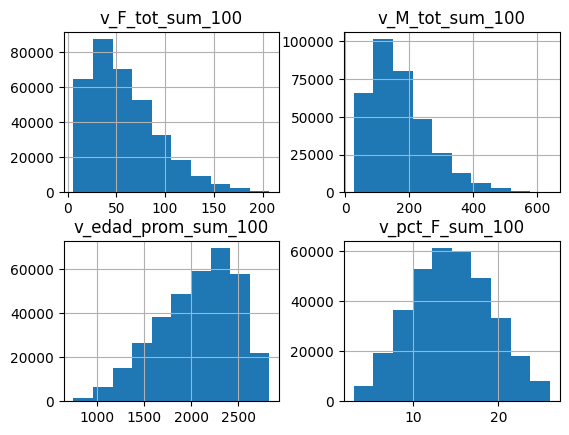

In [65]:
X[varc[:4]].hist()

# Análisis Bivariado

In [66]:
X[varc].corr()

,v_F_tot_sum_100,v_M_tot_sum_100,v_edad_prom_sum_100,v_pct_F_sum_100,v_pct_M_sum_100,v_personas_tot_sum_100,v_tiempo_viaje_max_sum_100,v_tiempo_viaje_mean_sum_100,v_tiempo_viaje_min_sum_100,v_tiempo_viaje_std_sum_100,v_M_tot_mean_100,v_edad_prom_mean_100,v_personas_tot_mean_100,v_tiempo_viaje_max_mean_100,v_tiempo_viaje_mean_mean_100,v_tiempo_viaje_min_mean_100,v_edad_prom_min_100,v_tiempo_viaje_max_min_100,v_tiempo_viaje_mean_min_100,v_tiempo_viaje_min_min_100,v_F_tot_max_100,v_M_tot_max_100,v_edad_prom_max_100,v_personas_tot_max_100,v_tiempo_viaje_max_max_100,v_tiempo_viaje_mean_max_100,v_tiempo_viaje_min_max_100,v_M_tot_std_100,v_edad_prom_std_100,v_personas_tot_std_100,v_tiempo_viaje_max_std_100,v_tiempo_viaje_mean_std_100,v_tiempo_viaje_min_std_100,v_tiempo_viaje_std_mean_100,v_tiempo_viaje_std_min_100,v_tiempo_viaje_std_max_100,v_tiempo_viaje_std_std_100
v_F_tot_sum_100,1.000000,0.880124,0.741665,0.730838,0.603035,0.935210,0.621566,0.448873,-0.125811,0.536515,0.821882,-0.037577,0.900453,0.359245,-0.151284,-0.568674,0.186700,0.132857,0.110259,-0.299738,0.760270,0.603935,-0.154600,0.665322,0.242954,0.038955,-0.070314,0.658715,-0.565378,0.718327,0.208077,-0.036698,-0.161026,0.060790,0.063099,0.166424,0.083435
v_M_tot_sum_100,0.880124,1.000000,0.759737,0.448342,0.764527,0.991204,0.670785,0.510659,-0.071091,0.563985,0.969835,-0.004950,0.966921,0.412839,-0.092467,-0.536039,0.201339,0.188160,0.167247,-0.277710,0.689554,0.752334,-0.181136,0.760188,0.254643,0.043603,-0.067611,0.808262,-0.590313,0.812678,0.221893,-0.032160,-0.157691,0.083019,0.088145,0.172038,0.089302
v_edad_prom_sum_100,0.741665,0.759737,1.000000,0.666667,0.911111,0.773405,0.615331,0.580918,0.092459,0.561533,0.618564,0.190328,0.643268,0.260147,-0.196558,-0.575288,0.147137,0.031319,0.010756,-0.308479,0.470042,0.403779,-0.009374,0.422514,0.221596,0.069076,-0.052082,0.416800,-0.412968,0.434645,0.177520,-0.019167,-0.155965,0.047031,-0.034545,0.179428,0.094026
v_pct_F_sum_100,0.730838,0.448342,0.666667,1.000000,0.371749,0.538129,0.398777,0.335532,-0.035305,0.380682,0.318033,-0.065224,0.442661,0.136052,-0.228154,-0.483647,0.066815,-0.032628,-0.051853,-0.265602,0.436432,0.190017,-0.055593,0.251911,0.153528,0.039894,-0.045249,0.215670,-0.364681,0.265365,0.118840,-0.025516,-0.123878,0.000701,-0.054289,0.123448,0.058746
v_pct_M_sum_100,0.603035,0.764527,0.911111,0.371749,1.000000,0.738333,0.600701,0.590143,0.143644,0.537510,0.645754,0.010207,0.616687,0.268289,-0.141911,-0.503934,0.095293,0.059266,0.042120,-0.270136,0.402971,0.440421,-0.094139,0.435358,0.211037,0.069400,-0.043815,0.442567,-0.468662,0.442412,0.170730,-0.013195,-0.140117,0.056736,-0.017834,0.170205,0.091062
v_personas_tot_sum_100,0.935210,0.991204,0.773405,0.538129,0.738333,1.000000,0.673580,0.506008,-0.088095,0.570213,0.952470,-0.014167,0.972199,0.408064,-0.111139,-0.558334,0.202215,0.177376,0.155479,-0.290688,0.726245,0.729490,-0.178199,0.752460,0.257654,0.043381,-0.070029,0.786475,-0.597896,0.806386,0.223505,-0.034217,-0.162503,0.078866,0.083333,0.174709,0.089865
v_tiempo_viaje_max_sum_100,0.621566,0.670785,0.615331,0.398777,0.600701,0.673580,1.000000,0.834041,0.186944,0.946501,0.623554,-0.001875,0.632921,0.903579,0.408545,-0.250960,0.121163,0.162435,0.149558,-0.187606,0.465136,0.459635,-0.116552,0.471355,0.790097,0.519290,0.095771,0.487878,-0.419231,0.498731,0.787314,0.466347,0.031026,0.663360,0.058260,0.708776,0.653069
v_tiempo_viaje_mean_sum_100,0.448873,0.510659,0.580918,0.335532,0.590143,0.506008,0.834041,1.000000,0.610967,0.773669,0.447125,-0.004837,0.445620,0.748480,0.650667,0.095198,0.062081,0.205731,0.201214,-0.104301,0.339833,0.345110,-0.065179,0.350108,0.560960,0.623928,0.348814,0.352916,-0.313716,0.357775,0.559656,0.587770,0.303249,0.558909,0.037229,0.550967,0.514075
v_tiempo_viaje_min_sum_100,-0.125811,-0.071091,0.092459,-0.035305,0.143644,-0.088095,0.186944,0.610967,1.000000,0.027424,-0.111276,-0.009207,-0.133962,0.217346,0.657785,0.721907,-0.090982,0.168378,0.183362,0.142281,-0.076756,-0.031

In [67]:
import seaborn as sns

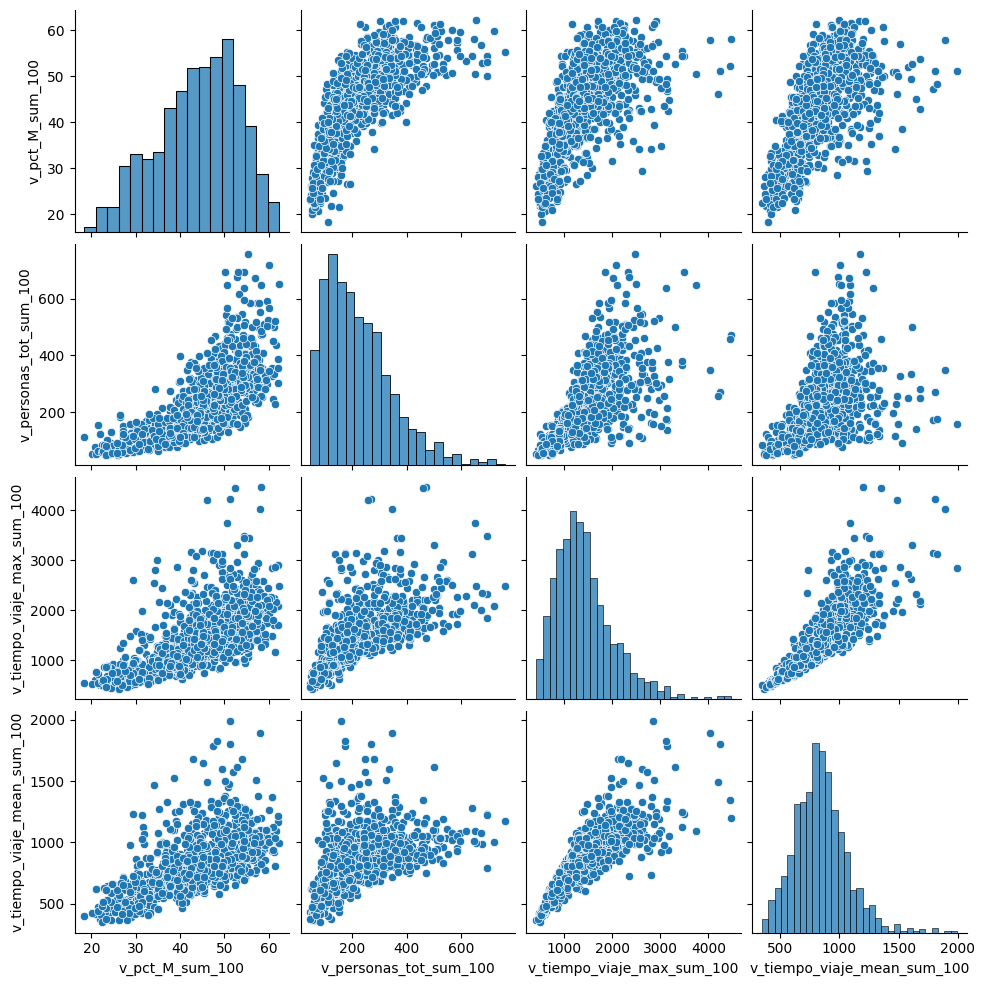

In [70]:
sns.pairplot( X[varc[4:8]].sample(1000) )

## Multicolinealidad 

In [85]:
### Actualizar varclushi
###!pip install --upgrade varclushi

In [80]:
from varclushi import VarClusHi

###### Para los clusters de variables con base en su correlación

In [81]:
vc = VarClusHi( df= X[varc] , feat_list=varc )

In [82]:
# Aquí se genera el cluster
vc.varclus()

In [86]:
rs = vc.rsquare

In [89]:
rs = rs.sort_values( by=['Cluster','RS_Ratio'] , ascending=[1,1] ).reset_index(drop=True)

In [90]:
rs['id'] = rs.groupby( 'Cluster' ).cumcount() + 1

In [91]:
rs

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio,id
0,0,v_personas_tot_std_100,0.971275,0.437998,0.051112,1
1,0,v_M_tot_std_100,0.941827,0.401484,0.097196,2
2,0,v_personas_tot_max_100,0.924592,0.389539,0.123526,3
3,0,v_M_tot_max_100,0.884359,0.351745,0.178388,4
4,0,v_M_tot_mean_100,0.871107,0.687934,0.413031,5
5,0,v_personas_tot_mean_100,0.871056,0.753566,0.523241,6
6,0,v_F_tot_max_100,0.684164,0.434654,0.558660,7
7,1,v_tiempo_viaje_std_std_100,0.935485,0.528418,0.136806,1
8,1,v_tiempo_viaje_std_max_100,0.924942,0.585527,0.181092,2
9,1,v_tiempo_viaje_max_std_100,0.901208,0.657804,0.288698,3


In [94]:
varc = rs.loc[rs['id'] == 1]['Variable'].tolist()

In [95]:
varc

['v_personas_tot_std_100',
 'v_tiempo_viaje_std_std_100',
 'v_tiempo_viaje_min_std_100',
 'v_tiempo_viaje_mean_min_100',
 'v_edad_prom_sum_100',
 'v_edad_prom_max_100',
 'v_tiempo_viaje_max_sum_100']

In [115]:
tad_01 = X[um + varc].merge( tad[um + [tgt] ] , on = um , how='inner' ).reset_index(drop=True)

In [116]:
tad_01.to_parquet("TAD_FINAL_ECO.parquet")

# Ajuste a una regresión lineal $y = \theta x + \theta _{0}$

In [117]:
tad_01.shape

(344661, 10)

<Axes: >

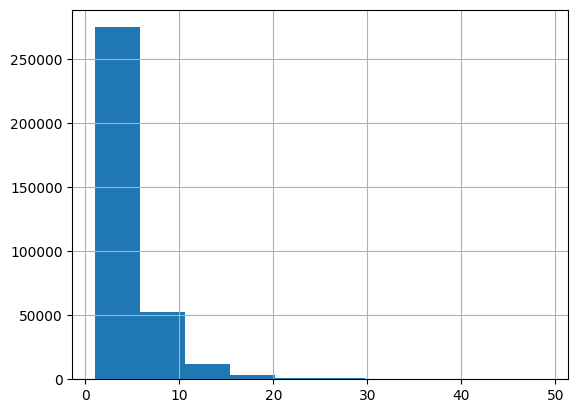

In [118]:
tad_01[tgt].hist()

<Axes: >

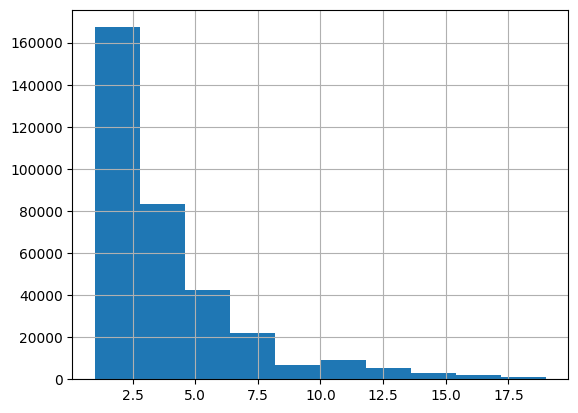

In [119]:
tad_01 = tad_01.loc[ tad_01[tgt]<20 ].reset_index()
tad_01[tgt].hist()

In [121]:
tad_01.shape

(342125, 11)

In [122]:
(342125/344661)*100

99.26420453721192